# DATA 5600: Introduction to Regression and Machine Learning for Analytics

## __Bayesian Linear Regression with pymc3__

<br>

Author:  Tyler J. Brough <br>
Updated: December 8, 2021 <br>

---

<br>

In [1]:
import arviz as az
import pandas as pd
import pymc3 as pm

<br>

## __Simple Linear Regression__

---

<br>

In [2]:
raw_data = pd.read_excel('FOREST.XLS')

In [3]:
raw_data.head()

,Forest loss,Pop dens,Crop ch,Pasture ch
0,0.7,357.0,27.9,0.0
1,0.7,48.0,1.7,0.0
2,0.8,932.0,14.5,0.0
3,0.7,366.0,17.9,0.0
4,0.8,83.0,2.2,0.0


In [4]:
y = raw_data['Forest loss'].to_numpy()
x = raw_data['Pop dens'].to_numpy()

In [5]:
with pm.Model() as model:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    
    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace = pm.sample(2000, step, start=start)

<ipython-input-5-9be0fe5188c0>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, step, start=start)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/tjb/anaconda3/envs/DATA5600/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'α'}>,
        <AxesSubplot:title={'center':'α'}>],
       [<AxesSubplot:title={'center':'β'}>,
        <AxesSubplot:title={'center':'β'}>],
       [<AxesSubplot:title={'center':'ϵ'}>,
        <AxesSubplot:title={'center':'ϵ'}>]], dtype=object)

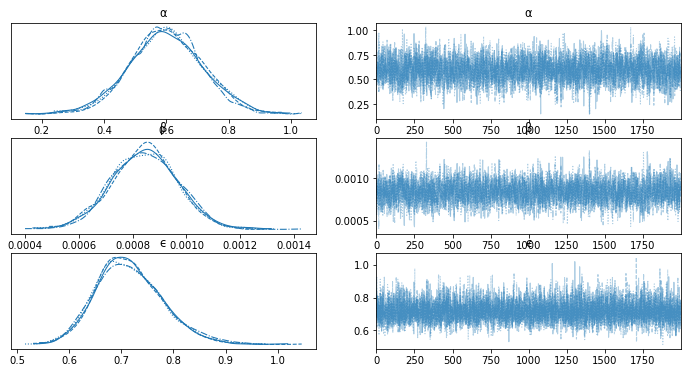

In [6]:
az.plot_trace(trace, var_names=['α', 'β', 'ϵ'])

In [7]:
pm.summary(trace, var_names=['α', 'β', 'ϵ'], kind='stats')

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/tjb/anaconda3/envs/DATA5600/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
α,0.599,0.118,0.386,0.825
β,0.001,0.000,0.001,0.001
ϵ,0.716,0.064,0.601,0.837


In [ ]:
#pm.summary?

<br>

## __Multiple Linear Regression__

---

<br>

In [8]:
x1 = raw_data['Pop dens'].to_numpy()
x2 = raw_data['Crop ch'].to_numpy()

In [9]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta1 = pm.Normal('beta1', mu=0, sd=10)
    beta2 = pm.Normal('beta2', mu=0, sd=10)
    sigma = pm.HalfCauchy('sigma', beta=5)
    
    mu = alpha + beta1 * x1 + beta2 * x2
    y_pred = pm.Normal('y_pred', mu=mu, sd=sigma, observed=y)
    trace2 = pm.sample(1000)

<ipython-input-9-2ab20ccb8ce0>:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace2 = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta2, beta1, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


In [10]:
pm.summary(trace2, var_names=['alpha', 'beta1', 'beta2', 'sigma'], kind='stats')

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/tjb/anaconda3/envs/DATA5600/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
alpha,0.571,0.148,0.301,0.863
beta1,0.001,0.000,0.001,0.001
beta2,0.004,0.011,-0.017,0.023
sigma,0.723,0.066,0.606,0.848
